In [25]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.interpolate import interp1d
from scipy.integrate import quad

M = 1.673e-27 #[kg] hydrogen mass
m = 9.109e-31 #[kg] electron mass
k = 1.38064852e-23 #[m2 kg s-2 K-1] Boltzmann constant
e = 1.6e-19 #[C] electron charge

In [42]:
def maxwellian(v, Te, reaction_name): #Te -> eV
    return (m/(2*np.pi*e*Te))**1.5*cross_section_from_xs(v, reaction_name)*v*np.exp(-(m*v**2)/(2*e*Te))*4*np.pi*v**2
    #return (m/(2*np.pi*e*Te))**1.5*np.exp(-(m*v**2)/(2*e*Te))*4*np.pi*v**2

def cross_section_from_xs(v,reaction_name): #XS가 점데이터로 주어진 경우 (excel에 정리해서 쓰면됨)
    Te = 1/2*m*v**2/e
    Te_data = data[str(reaction_name)+'[eV]']
    xs_data = data[str(reaction_name)+'[cm2]']
    f = interp1d(Te_data, xs_data, fill_value='extrapolate')
    if f(Te) > 0:
        return f(Te)
    else:
        return 1e-22
#     ans = [1e-22 if i < 0 else i for i in list(f(Te))]
#     return np.array(ans)

def rate_constant(Te, reaction_name):
    return quad(maxwellian,0,3e8, args=(Te, reaction_name),epsabs=1e-15,limit=100)[0]

In [133]:
data = pd.read_excel('Working/XS_test.xlsx',header=1)

In [44]:
Te_data = data['reaction13[eV]']
xs_data = data['reaction13[cm2]']
f = interp1d(Te_data,xs_data,fill_value='extrapolate')

In [21]:
Te_list = np.logspace(0,3,100)
v_list = np.array(list(map(lambda Te:np.sqrt(2*e*Te/m),Te_list)))

In [62]:
Te = 5
reaction_name = 'reaction13'

In [63]:
quad(maxwellian,0,3e8, args=(Te, reaction_name),epsabs=1e-15,limit=100)

c:\users\gunu\anaconda3\envs\py_36\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in greater
  # Remove the CWD from sys.path while we load stuff.


(1.0851063897939721e-12, 9.760405274800042e-16)

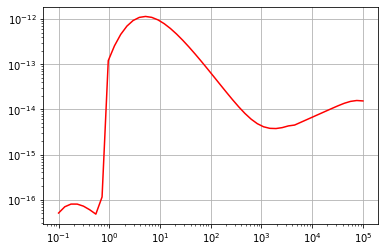

In [24]:
K_list1 = np.array([])
Te_list = np.logspace(-1,5)
reaction_name = 'reaction13'
for Te in Te_list:
    K_1, err = quad(maxwellian, 0, 3e8, args=(Te, reaction_name),epsabs=1e-15,limit=100)
    K_list1 = np.append(K_list1,K_1)

plt.plot(Te_list,K_list1,'r')
plt.xscale('log')
plt.yscale('log')
plt.grid(1)

## Rate constant
1. XS만 점데이터로 주어진경우 -> interpolation해서 씀
2. XS가 analytic하게 주어진경우 -> 그냥 씀
3. Rate constant가 analytic하게 주어진경우 ->그냥 씀

<img src = 'ref_pic/rate_const.png'>

[28] 의 2.2.10 Reaction <br>

$e + H_2 -> e + e + H^+ + H$

<img src = 'ref_pic/2.2.10 reaction.png' width = '400'>

점선이 XS, 실선이 K

<img src='ref_pic/reactions.png' width='400'>

In [202]:
a0 = -3.833822745947e+03 
a1 = 5.694871055047e+03
a2 = -3.683040395270e+03
a3 = 1.338526896657e+03
a4 = -2.988408134179e+02
a5 = 4.197687137005e+01
a6 = -3.624797562843e+00
a7 = 1.760638946986e-01
a8 = -3.685905968490e-03
a_list = np.array([a0,a1,a2,a3,a4,a5,a6,a7,a8])

b0 = -3.834597006782e+01
b1 = 1.426322356722e+01
b2 = -5.826468569506e+00
b3 = 1.727940947913e+00
b4 = -3.598120866343e-01
b5 = 4.822199350494e-02
b6 = -3.909402993006e-03
b7 = 1.738776657690e-04
b8 = -3.252844486351e-06
b_list = np.array([b0,b1,b2,b3,b4,b5,b6,b7,b8])

(1e-15, 1e-06)

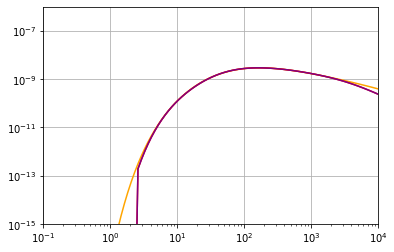

In [327]:
K_list1 = np.array([])
K_list2 = np.array([])
Te_list = np.logspace(-1,4,100)
for Te in Te_list:
    K_1, err = quad(maxwellian, 0, 3e8, args=(Te,),epsabs=1e-26)
    K_2, err = quad(maxwellian, 0, 3e8, args=(Te,),epsabs=1e-26)
    K_list1 = np.append(K_list1,K_1)
    K_list2 = np.append(K_list2,K_2)

plt.plot(Te_list,reaction_rate(Te_list),'orange')
plt.plot(Te_list,K_list1*1e6,'r')
plt.plot(Te_list,K_list2*1e6,'purple')
plt.xscale('log')
plt.yscale('log')
plt.grid(1)
plt.xlim(1e-1,1e4)
plt.ylim(1e-15,1e-6)

(1e-20, 1e-17)

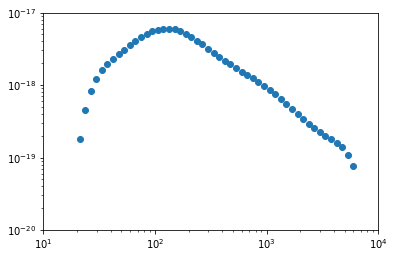

In [250]:
plt.scatter(Te,xs)
plt.xscale('log')
plt.yscale('log')
plt.xlim(1e1,1e4)
plt.ylim(1e-20,1e-17)

In [96]:
data = pd.read_excel('Working/XS_test.xlsx',header=1)
Te = data['reaction6_5[eV]']
xs = data['reaction6_5[cm2]']
f = interp1d(Te, xs,fill_value='extrapolate')

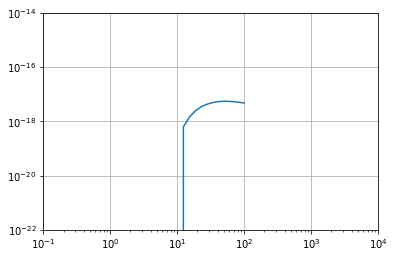

In [97]:
Te1 = np.logspace(-1,8,100)
plt.plot(Te1,f(Te1))
plt.xscale('log')
plt.yscale('log')
plt.xlim(1e-1,1e4)
plt.ylim(1e-22,1e-14)
plt.grid(1)

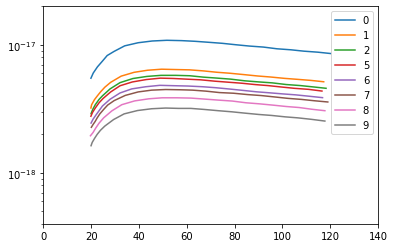

In [79]:
Te_range = np.linspace(0,120,100)
num = [0,1,2,5,6,7,8,9]
for i in num:
    Te6 = data['reaction6_'+str(i)+'[eV]']
    xs6 = data['reaction6_'+str(i)+'[cm2]']
    plt.plot(Te6,xs6)
plt.xlim(0,140)
plt.ylim(4e-19,2e-17)
plt.yscale('log')
plt.legend(num)
plt.show()

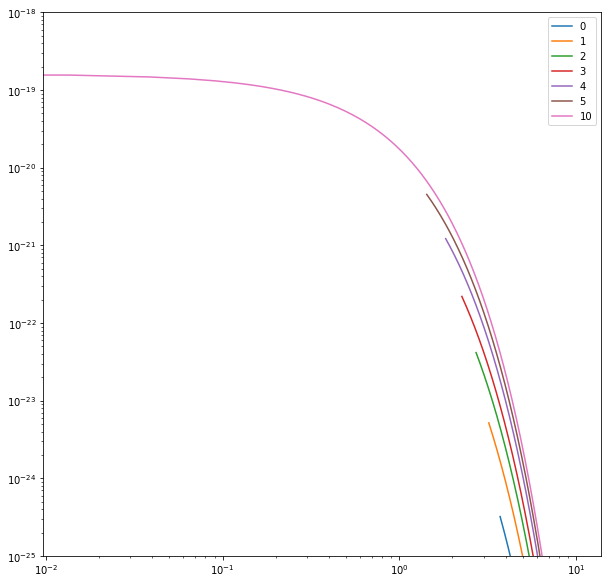

In [116]:
E_th = np.array([3.72,3.21,2.72,2.26,1.83,1.43,1.36,0.713,0.397,0.113,-0.139,-0.354,-0.529,-0.659,-0.736])
Sigma_v0 = np.array([3.22e-5, 5.18e-4, 4.16e-3 ,2.20e-2 ,1.22e-1 , 4.53e-1, 1.51, 4.48, 10.1, 13.9, 11.8, 8.87, 7.11, 5.00, 3.35])*1e-16
E_0 = 0.45

kk = [0,1,2,3,4,5,10]
plt.figure(figsize=(10,10))
for i in kk:
    E = np.linspace(E_th[i],10,400)
    xs = Sigma_v0[i]*np.exp(-(E-abs(E_th[i]))/E_0)*1e-4
    plt.plot(E,xs)

plt.yscale('log')
plt.xscale('log')
plt.ylim(1e-25,1e-18)
plt.legend(kk)
plt.show()

In [129]:
def analytic_xs(v,reaction_name):
    Te = 1/2*m*v**2/e
    if 'reaction5_' in reaction_name:
        E_th = np.array([3.72,3.21,2.72,2.26,1.83,1.43,1.36,0.713,0.397,0.113,-0.139,-0.354,-0.529,-0.659,-0.736])
        Sigma_v0 = np.array([3.22e-5, 5.18e-4, 4.16e-3 ,2.20e-2 ,1.22e-1 , 4.53e-1, 1.51, 4.48, 10.1, 13.9, 11.8, 8.87, 7.11, 5.00, 3.35])*1e-16
        E_0 = 0.45
        i = int(reaction_name[-1])
        return Sigma_v0[i]*np.exp(-(E-abs(E_th[i]))/E_0)

    else:
        return 0

In [125]:
reaction_name = 'reaction5_2'
a = int(reaction_name[-1])

In [157]:
#!/usr/bin/env python
# coding: utf-8

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.interpolate import interp1d
from scipy.integrate import quad

M = 1.673e-27 #[kg] hydrogen mass
m = 9.109e-31 #[kg] electron mass
k = 1.38064852e-23 #[m2 kg s-2 K-1] Boltzmann constant
e = 1.6e-19 #[C] electron charge
data = pd.read_excel('XS_test.xlsx',header=1)

def maxwellian_with_point_xs(v, Te, reaction_name): 
    return (m/(2*np.pi*e*Te))**1.5*point_xs(v, reaction_name)*v*np.exp(-(m*v**2)/(2*e*Te))*4*np.pi*v**2
    #return (m/(2*np.pi*e*Te))**1.5*np.exp(-(m*v**2)/(2*e*Te))*4*np.pi*v**2

def maxwellian_with_analytic_xs(v,Te, reaction_name):
    return (m/(2*np.pi*e*Te))**1.5*analytic_xs(v, reaction_name)*v*np.exp(-(m*v**2)/(2*e*Te))*4*np.pi*v**2

def point_xs(v,reaction_name):
    Te = 1/2*m*v**2/e
    Te_data = data[str(reaction_name)+'[eV]']
    xs_data = data[str(reaction_name)+'[cm2]']
    f = interp1d(Te_data, xs_data, fill_value='extrapolate')
    if f(Te) > 0:
        return f(Te)
    else:
        return 1e-22
    
def analytic_xs(v,reaction_name):
    Te = 1/2*m*v**2/e
    if 'reaction5_' in reaction_name:
        E_th = np.array([3.72,3.21,2.72,2.26,1.83,1.43,1.36,0.713,0.397,0.113,-0.139,-0.354,-0.529,-0.659,-0.736])
        Sigma_v0 = np.array([3.22e-5, 5.18e-4, 4.16e-3 ,2.20e-2 ,1.22e-1 , 4.53e-1, 1.51, 4.48, 10.1, 13.9, 11.8, 8.87, 7.11, 5.00, 3.35])*1e-16
        E_0 = 0.45
        i = int(reaction_name[-1])
        if E_th[i] < Te:
            return Sigma_v0[i]*np.exp(-(Te-abs(E_th[i]))/E_0)
        else:
            return 1e-23
    if 'reaction1_' in reaction_name:
        dE = 15.42
        C_0 = 2.05*dE
        x = Te/dE
        F_0v = np.array([0.092, 0.162, 0.176, 0.155, 0.121])
        xs_ndiss_ion = 1.828/x*(1-1/x**0.92)**2.19*np.log(C_0*x)*1e-16
        i = int(reaction_name[-1])
        return F_0v[i]*xs_ndiss_ion

    else:
        return 0
    
    
def rate_constant_with_point_xs(Te, reaction_name):
    return quad(maxwellian_with_point_xs,0,3e8, args=(Te, reaction_name),epsabs=1e-15,limit=100)[0]

def rate_constant_with_analytic_xs(Te, reaction_name):
    return quad(maxwellian_with_analytic_xs,0,3e8, args=(Te, reaction_name),epsabs=1e-15,limit=100)[0]

In [155]:
rate_constant_with_analytic_xs(30, 'reaction5_0')

1.0026038019713152e-14